In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer


In [ ]:
# train_sen=["this is chinni","hello this is gau","Hey hello?"]

train_sen=["it is sunny day","it is rainy"]
new=["there is sun","hello chinni","it is sunny"]

In [ ]:
tokenizer=Tokenizer(num_words=100,oov_token="<oov>")
tokenizer.fit_on_texts(new)

print(tokenizer.word_index)

{'<oov>': 1, 'is': 2, 'there': 3, 'sun': 4, 'hello': 5, 'chinni': 6, 'it': 7, 'sunny': 8}


In [ ]:
seq=tokenizer.texts_to_sequences(new)

print(tokenizer.word_index)

print(seq)

{'<oov>': 1, 'is': 2, 'there': 3, 'sun': 4, 'hello': 5, 'chinni': 6, 'it': 7, 'sunny': 8}
[[3, 2, 4], [5, 6], [7, 2, 8]]


Apply Padding


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
train=["hello word","it might rain","it is very rainy"]

In [ ]:
tokenizer=Tokenizer(num_words=100,oov_token='<oov>')

tokenizer.fit_on_texts(train)

print(tokenizer.word_index)

{'<oov>': 1, 'it': 2, 'hello': 3, 'word': 4, 'might': 5, 'rain': 6, 'is': 7, 'very': 8, 'rainy': 9}


In [ ]:
seq=tokenizer.texts_to_sequences(train)

seq

[[3, 4], [2, 5, 6], [2, 7, 8, 9]]

In [ ]:

# ... your previous code ...

# In cell 14, rename the variable to avoid overwriting the function
padded_sequence = pad_sequences(seq)
print(padded_sequence)

# ... continue with your code using 'padded_sequence' instead of 'pad_sequence' ...

[[0 0 3 4]
 [0 2 5 6]
 [2 7 8 9]]


In [ ]:
pad=pad_sequences(seq,
                            padding="post",
                            maxlen=3,
                            truncating="post"
                              )
pad

array([[3, 4, 0],
       [2, 5, 6],
       [2, 7, 8]], dtype=int32)

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/wdd-2-node.appspot.com/x1.json \
    -o /tmp/headlines.json

In [ ]:
import pandas as pd
df=pd.read_json('./x1.json')

FileNotFoundError: File ./x1.json does not exist

In [ ]:
data.head()

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.17.1


In [ ]:
data,info=tfds.load("imdb_reviews",with_info=True,as_supervised=True)


In [ ]:
train,test=data['train'],data['test']

train_sen=[]
test_sen=[]

train_labels=[]
test_labels=[]


In [ ]:
for sent,label in train:
  train_sen.append(str(sent.numpy().decode('utf8')))
  train_labels.append(label.numpy())

for sent,label in test:
  test_sen.append(str(sent.numpy().decode('utf8')))
  test_labels.append(label.numpy())


In [ ]:
train_labels=np.array(train_labels)
test_labels=np.array(test_labels)


In [ ]:
vocab_size=10000
embedding_dim=16
max_length=150
trunc_type='post'
oov_tok="<oov>"

tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_sen)
word_index=tokenizer.word_index

train_seq=tokenizer.texts_to_sequences(train_sen)
train_pad=pad_sequences(train_seq,maxlen=max_length,truncating=trunc_type)


test_seq=tokenizer.texts_to_sequences(test_sen)
test_pad=pad_sequences(test_seq,maxlen=max_length,truncating=trunc_type)

In [ ]:
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])

def decode_review(text):
  return ' '.join([reverse_word_index.get(i,'?') for i in text])
print(train_sen[1])
print(train_pad[1])
print(decode_review(train_pad[1]))


I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of what was causing them or why. I admit, I may have missed part of the film, but i watched the majority of it and everything just seemed to happen of its own accord without any real concern for anything else. I cant recommend this film at all.
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0   11   26   75  571
    6  805 2354  313  106   19   12    7  629  686    6    4 2219    5
  181  584   64 1454  110 2263    3 3951   21    2    1    3  258   41
 4677    4  174  188   21  

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
num=10
model.fit(train_pad,train_labels,epochs=num,validation_data=(test_pad,test_labels))

In [ ]:
l1=model.layers[0]

weights=l1.get_weights()[0]
print(weights.shape)
print(weights)

In [ ]:

data,info=tfds.load("yelp_polarity_reviews",with_info=True, as_supervised=True)

data

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [ ]:
train_data,test_data=data['train'],data['test']

train_sen=[]
test_sen=[]

train_labels=[]
test_labels=[]

In [ ]:
for sent,labels in train_data:
  train_sen.append(str(sent.numpy().decode('utf8')))
  train_labels.append(labels.numpy())
for sent,labels in test_data:
  test_sen.append(str(sent.numpy().decode('utf8')))
  test_labels.append(labels.numpy())

In [ ]:
train_labels=np.array(train_labels)
test_labels=np.array(test_labels)

In [ ]:
voc_size=10000
embedding_dim=32
max_length=120
trunc_type='post'
oov_tok="<oov>"

tokenizer=Tokenizer(num_words=voc_size,oov_token=oov_tok)


In [ ]:
train_seq=tokenizer.texts_to_sequences(train_sen)
# Filter out empty sequences

train_pad=pad_sequences(train_seq,maxlen=max_length,truncating=trunc_type)

test_seq=tokenizer.texts_to_sequences(test_sen)
test_pad=pad_sequences(test_seq,maxlen=max_length,truncating=trunc_type)

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ... (your previous code) ...

# In cell 25:

train_seq = tokenizer.texts_to_sequences(train_sen)
# Filter out empty sequences
train_seq = [seq for seq in train_seq if seq]  # Remove empty lists representing empty sentences

train_pad = pad_sequences(train_seq, maxlen=max_length, truncating=trunc_type)

test_seq = tokenizer.texts_to_sequences(test_sen)
# Filter out empty sequences in test_seq as well
test_seq = [seq for seq in test_seq if seq]

test_pad = pad_sequences(test_seq, maxlen=max_length, truncating=trunc_type)

# ... (rest of your code) ...

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(voc_size,embedding_dim,input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')

    ])

model.summary()

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(train_pad,train_labels,epochs=10,validation_data=(test_pad,test_labels))


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
data = "October arrived, spreading a damp chill over the grounds and into the castle.\n Madam Pomfrey, the nurse, was kept busy by a sudden spate of colds among the staff and students.\n Her Pepperup potion worked instantly, though it left the drinker smoking at the ears for several hours afterward. Ginny Weasley, who had been looking pale, was bullied into taking some by Percy.\n The steam pouring from under her vivid hair gave the impression that her whole head was on fire.\n Raindrops the size of bullets thundered on the castle windows for days on end; the lake rose, the flower beds turned into muddy streams, and Hagrid's pumpkins swelled to the size of garden sheds.\n Oliver Wood's enthusiasm for regular training sessions, however, was not dampened, which was why Harry was to be found, late one stormy Saturday afternoon a few days before Halloween, returning to Gryffindor Tower, drenched to the skin and splattered with mud."


In [ ]:
tokenizer=Tokenizer()

corpus=data.lower().split("\n")

print(corpus)

['october arrived, spreading a damp chill over the grounds and into the castle.', ' madam pomfrey, the nurse, was kept busy by a sudden spate of colds among the staff and students.', ' her pepperup potion worked instantly, though it left the drinker smoking at the ears for several hours afterward. ginny weasley, who had been looking pale, was bullied into taking some by percy.', ' the steam pouring from under her vivid hair gave the impression that her whole head was on fire.', " raindrops the size of bullets thundered on the castle windows for days on end; the lake rose, the flower beds turned into muddy streams, and hagrid's pumpkins swelled to the size of garden sheds.", " oliver wood's enthusiasm for regular training sessions, however, was not dampened, which was why harry was to be found, late one stormy saturday afternoon a few days before halloween, returning to gryffindor tower, drenched to the skin and splattered with mud."]


In [ ]:
tokenizer.fit_on_texts(corpus)

voc_size=len(tokenizer.word_index)+1

voc_size
print(tokenizer.word_index)

{'the': 1, 'was': 2, 'and': 3, 'to': 4, 'a': 5, 'into': 6, 'of': 7, 'her': 8, 'for': 9, 'on': 10, 'castle': 11, 'by': 12, 'size': 13, 'days': 14, 'october': 15, 'arrived': 16, 'spreading': 17, 'damp': 18, 'chill': 19, 'over': 20, 'grounds': 21, 'madam': 22, 'pomfrey': 23, 'nurse': 24, 'kept': 25, 'busy': 26, 'sudden': 27, 'spate': 28, 'colds': 29, 'among': 30, 'staff': 31, 'students': 32, 'pepperup': 33, 'potion': 34, 'worked': 35, 'instantly': 36, 'though': 37, 'it': 38, 'left': 39, 'drinker': 40, 'smoking': 41, 'at': 42, 'ears': 43, 'several': 44, 'hours': 45, 'afterward': 46, 'ginny': 47, 'weasley': 48, 'who': 49, 'had': 50, 'been': 51, 'looking': 52, 'pale': 53, 'bullied': 54, 'taking': 55, 'some': 56, 'percy': 57, 'steam': 58, 'pouring': 59, 'from': 60, 'under': 61, 'vivid': 62, 'hair': 63, 'gave': 64, 'impression': 65, 'that': 66, 'whole': 67, 'head': 68, 'fire': 69, 'raindrops': 70, 'bullets': 71, 'thundered': 72, 'windows': 73, 'end': 74, 'lake': 75, 'rose': 76, 'flower': 77, '

In [ ]:
input_sequences=[]
for line in corpus:
  token_list=tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(token_list)):
    n_gram_sequence=token_list[:i+1]
    input_sequences.append(n_gram_sequence)

In [ ]:
max_seq_len=max([len(i) for i in input_sequences])

input_seq_array=np.array(pad_sequences(input_sequences,maxlen=max_seq_len,padding='pre'))

input_seq_array

array([[  0,   0,   0, ...,   0,  15,  16],
       [  0,   0,   0, ...,  15,  16,  17],
       [  0,   0,   0, ...,  16,  17,   5],
       ...,
       [  0,   0,  87, ..., 113,   3, 114],
       [  0,  87,  88, ...,   3, 114, 115],
       [ 87,  88,  89, ..., 114, 115, 116]], dtype=int32)

In [ ]:
x=input_seq_array[:,:-1]
labels=input_seq_array[:,-1]

y=tf.keras.utils.to_categorical(labels,num_classes=voc_size)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
x[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, 15], dtype=int32)

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(voc_size,64,input_length=max_seq_len-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(voc_size,activation='softmax')

    ])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(x,y,epochs=500,verbose=1)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.0000e+00 - loss: 4.7632
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0666 - loss: 4.7535
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0857 - loss: 4.7404
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0953 - loss: 4.7228
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0653 - loss: 4.7065
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1261 - loss: 4.6465
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0888 - loss: 4.6035
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0810 - loss: 4.5736
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0875 - loss: 4.4843
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0701 - loss: 4.5074
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0914 - loss: 4.4358
Epoch 12/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0797 

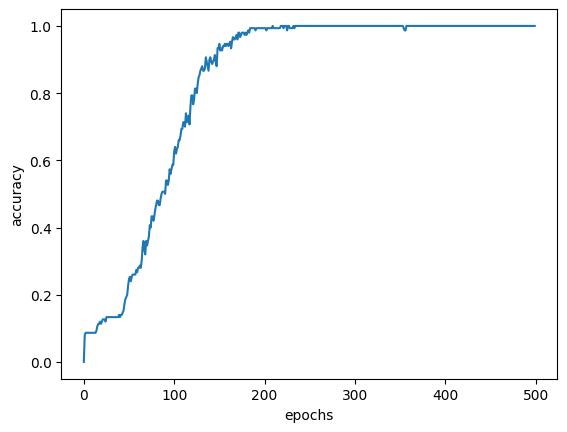

In [ ]:
import matplotlib.pyplot as plt

def plot_metrics(history, metric):
  plt.plot(history.history[metric])
  plt.xlabel("epochs")
  plt.ylabel(metric)
  plt.show()

plot_metrics(history,'accuracy')

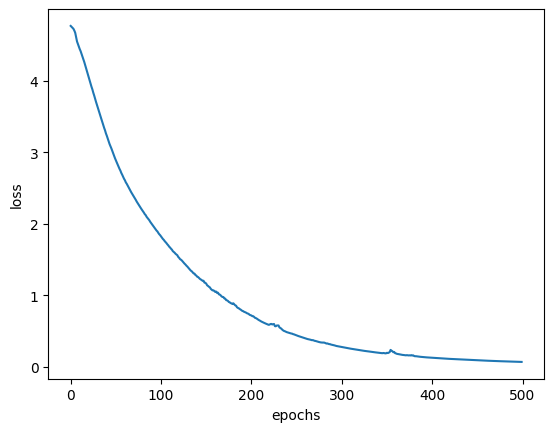

In [ ]:
plot_metrics(history,'loss')

In [ ]:
send_text="it is a cold night."

next_words=5

for i in range(next_words):
  token_list=tokenizer.texts_to_sequences([send_text])[0]
  token_list=pad_sequences([token_list],maxlen=max_seq_len-1,padding='pre')
  predicted=np.argmax(model.predict(token_list,verbose=0))
  output_word=''
  for word,index in tokenizer.word_index.items():
    if index==predicted:
      output_word=word
      break

  send_text+=" "+output_word


send_text

'it is a cold night. the size of bullets thundered'

In [ ]:
 ##download data from this url
!wget --no-check-certificate \
    https://raw.githubusercontent.com/dswh/lil_nlp_with_tensorflow/main/sonnets.txt \
    -O /tmp/sonnet.txt

--2024-12-23 17:44:29--  https://raw.githubusercontent.com/dswh/lil_nlp_with_tensorflow/main/sonnets.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29658 (29K) [text/plain]
Saving to: ‘/tmp/sonnet.txt’

/tmp/sonnet.txt     100%[===================>]  28.96K  --.-KB/s    in 0s      

2024-12-23 17:44:29 (122 MB/s) - ‘/tmp/sonnet.txt’ saved [29658/29658]



In [ ]:
poems=open('/tmp/sonnet.txt').read()
print(len(poems))

28893


In [ ]:
corpus=poems.lower().split('\n')

print(corpus)

['i', '', ' from fairest creatures we desire increase,', " that thereby beauty's rose might never die,", ' but as the riper should by time decease,', ' his tender heir might bear his memory:', ' but thou, contracted to thine own bright eyes,', " feed'st thy light's flame with self-substantial fuel,", ' making a famine where abundance lies,', ' thy self thy foe, to thy sweet self too cruel:', " thou that art now the world's fresh ornament,", ' and only herald to the gaudy spring,', ' within thine own bud buriest thy content,', " and tender churl mak'st waste in niggarding:", '   pity the world, or else this glutton be,', "   to eat the world's due, by the grave and thee.", '', ' ii', '', ' when forty winters shall besiege thy brow,', " and dig deep trenches in thy beauty's field,", " thy youth's proud livery so gazed on now,", " will be a tatter'd weed of small worth held:", ' then being asked, where all thy beauty lies,', ' where all the treasure of thy lusty days;', ' to say, within t

In [ ]:
tokenizer=Tokenizer()

In [ ]:
tokenizer.fit_on_texts(corpus)
voc_size=len(tokenizer.word_index)+1

voc_size

1544

In [ ]:
input_seq=[]
for line in corpus:
  token_list=tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(token_list)):
    n_gram_sequence=token_list[:i+1]
    input_seq.append(n_gram_sequence)



In [ ]:
max_seq_len=max([len(x) for x in input_seq])
input_seq_array=np.array(pad_sequences(input_seq,maxlen=max_seq_len,padding='pre'))

In [ ]:
x=input_seq_array[:,:-1]
labels=input_seq_array[:,-1]

y=tf.keras.utils.to_categorical(labels,num_classes=voc_size)

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(voc_size,120,input_length=max_seq_len-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(120)),
    tf.keras.layers.Dense(voc_size,activation='softmax')
])

adam=tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(x,y,epochs=350,verbose=1)

Epoch 1/350
142/142 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.0190 - loss: 6.8155
Epoch 2/350
142/142 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 0.0360 - loss: 6.0159
Epoch 3/350
142/142 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.0879 - loss: 5.2688
Epoch 4/350
142/142 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.1892 - loss: 4.1242
Epoch 5/350
142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.3901 - loss: 2.8413
Epoch 6/350
142/142 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.5758 - loss: 1.9014
Epoch 7/350
142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.7353 - loss: 1.2401
Epoch 8/350
142/142 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.8104 - loss: 0.8601
Epoch 9/350
142/142 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.8538 - loss: 0.6453
Epoch 10/350
142/142 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.8779 - loss: 0.5135
Epoch 11/350
142/142 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.8752 - loss: 0.4662
Epoch 12/350
142/142 ━━━━

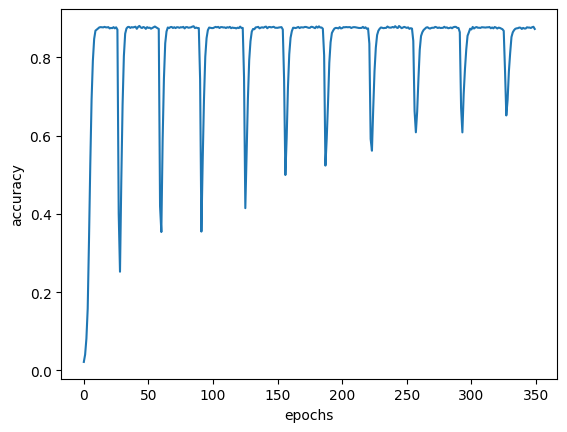

In [ ]:
def plot_metrics(history,metics):
  plt.plot(history.history[metics])
  plt.xlabel('epochs')
  plt.ylabel(metics)
  plt.show()


plot_metrics(history,'accuracy')


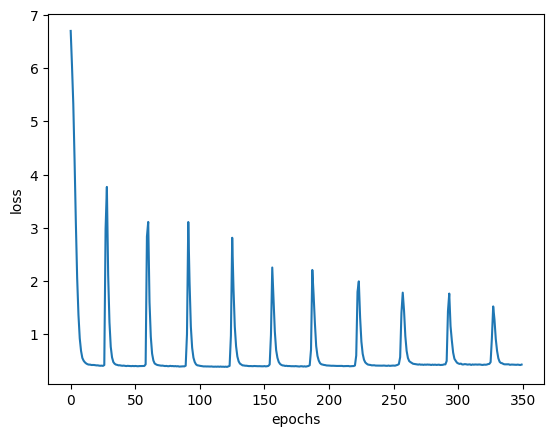

In [ ]:
plot_metrics(history,'loss')


In [ ]:
seed_text="It is cold night"

next_words=25
for i in range(next_words):
  token_list=tokenizer.texts_to_sequences([seed_text])[0]
  token_list=pad_sequences([token_list],maxlen=max_seq_len-1,padding='pre')
  predicted=np.argmax(model.predict(token_list,verbose=0))
  output_word=''
  for word, index in tokenizer.word_index.items():
    if index==predicted:
      output_word=word
      break
  seed_text+=""+output_word

print(seed_text)



It is cold nightthyisisisisisisisisisisisisisisisisisisisisisisisis
